In [1]:
import numpy as np

from hex_engine import HexEngine


class HexEnum:
    # these are indexes into the board array
    # NONE = 0
    # WHITE = 1
    # WHITE_CONNECTED_LEFT = 2
    # WHITE_CONNECTED_RIGHT = 3
    # BLACK = 4
    # BLACK_CONNECTED_TOP = 5
    # BLACK_CONNECTED_BOTTOM = 6

    WHITE = 0
    WHITE_CONNECTED_LEFT = 1
    WHITE_CONNECTED_RIGHT = 2
    BLACK = 3
    BLACK_CONNECTED_TOP = 4
    BLACK_CONNECTED_BOTTOM = 5


BOARD_SIZE = 3

In [2]:
def create_board(size):
    # Board is padded with 1 rows and 1 columns on each side
    board = []
    for row in range(size + 2):
        board.append([])
        for column in range(size + 2):
            # First two columns and last two are white
            # First two rows and last two are black
            black_top = 1 if row < 1 else 0
            black_bottom = 1 if row > size else 0
            white_left = 1 if column < 1 else 0
            white_right = 1 if column > size else 0
            black = 1 if black_top or black_bottom else 0
            white = 1 if white_left or white_right else 0
            board[row].append([white, white_left, white_right, black, black_top, black_bottom])
            # if black and white:
            #     board[row].append(0)
            # elif black_top:
            #     board[row].append(HexEnum.BLACK_CONNECTED_TOP)
            # elif black_bottom:
            #     board[row].append(HexEnum.BLACK_CONNECTED_BOTTOM)
            # elif white_left:
            #     board[row].append(HexEnum.WHITE_CONNECTED_LEFT)
            # elif white_right:
            #     board[row].append(HexEnum.WHITE_CONNECTED_RIGHT)
            # else:
            #     board[row].append(0)
    return board

In [3]:
def draw_board(board):
    for i in range(len(board)):
        for j in range(len(board)):
            # w = white, b = black, ' ' = empty
            # W = white connected, B = black connected
            # X = both colors
            if board[i][j][0] == 1 and board[i][j][3] == 1:
                print('X', end='')
            elif board[i][j][0] == 1:
                if board[i][j][1] == 1:
                    print('W', end='')
                elif board[i][j][2] == 1:
                    print('W', end='')
                else:
                    print('w', end='')
            elif board[i][j][3] == 1:
                if board[i][j][4] == 1:
                    print('B', end='')
                elif board[i][j][5] == 1:
                    print('B', end='')
                else:
                    print('b', end='')
            else:
                print(' ', end='')
            # if board[i][j] == 0:
            #     print(' ', end='')
            # elif board[i][j] == HexEnum.WHITE_CONNECTED_LEFT:
            #     print('W', end='')
            # elif board[i][j] == HexEnum.WHITE_CONNECTED_RIGHT:
            #     print('W', end='')
            # elif board[i][j] == HexEnum.BLACK_CONNECTED_TOP:
            #     print('B', end='')
            # elif board[i][j] == HexEnum.BLACK_CONNECTED_BOTTOM:
            #     print('B', end='')
            # elif board[i][j] == HexEnum.BLACK:
            #     print('b', end='')
            # elif board[i][j] == HexEnum.WHITE:
            #     print('w', end='')
        print()

In [4]:
draw_board(create_board(BOARD_SIZE))

XBBBX
W   W
W   W
W   W
XBBBX


In [5]:
def convert_board(engine, engine_board):
    board = create_board(BOARD_SIZE)
    for i in range(len(engine_board)):
        for j in range(len(engine_board)):
            if engine_board[i][j] == -1:
                board[i + 1][j + 1] = [0, 0, 0, 1, 0, 0]
                # board[i + 2][j + 2] = HexEnum.BLACK
                # Breadth first search to find connected black pieces

            elif engine_board[i][j] == 1:
                board[i + 1][j + 1] = [1, 0, 0, 0, 0, 0]
                # board[i + 2][j + 2] = HexEnum.WHITE

    def rec_walk(visited, position, hex_enum, color):
        if position in visited:
            return
        visited.add(position)
        adjacent = engine._get_adjacent(position)
        for adj in adjacent:
            if engine_board[adj[0]][adj[1]] == color:
                board[adj[0] + 1][adj[1] + 1][hex_enum] = 1
                # board[adj[0] + 2][adj[1] + 2] = hex_enum
                rec_walk(visited, adj, hex_enum, color)

    # From all edges, find connected pieces

    for i in range(0, BOARD_SIZE):
        # Top edge
        if engine_board[0][i] == -1:
            board[1][i + 1][HexEnum.BLACK_CONNECTED_TOP] = 1
            # board[2][i + 2] = HexEnum.BLACK_CONNECTED_TOP
            visited = {0, i}
            rec_walk(visited, (0, i), HexEnum.BLACK_CONNECTED_TOP, -1)
        # Bottom edge
        if engine_board[BOARD_SIZE - 1][i] == -1:
            board[BOARD_SIZE][i + 1][HexEnum.BLACK_CONNECTED_BOTTOM] = 1
            # board[BOARD_SIZE + 1][i + 2] = HexEnum.BLACK_CONNECTED_BOTTOM
            visited = {BOARD_SIZE - 1, i}
            rec_walk(visited, (BOARD_SIZE - 1, i), HexEnum.BLACK_CONNECTED_BOTTOM, -1)
        # Left edge
        if engine_board[i][0] == 1:
            board[i + 1][1][HexEnum.WHITE_CONNECTED_LEFT] = 1
            # board[i + 2][2] = HexEnum.WHITE_CONNECTED_LEFT
            visited = {i, 0}
            rec_walk(visited, (i, 0), HexEnum.WHITE_CONNECTED_LEFT, 1)
        # Right edge
        if engine_board[i][BOARD_SIZE - 1] == 1:
            board[i + 1][BOARD_SIZE][HexEnum.WHITE_CONNECTED_RIGHT] = 1
            # board[i + 2][BOARD_SIZE + 1] = HexEnum.WHITE_CONNECTED_RIGHT
            visited = {i, BOARD_SIZE - 1}
            rec_walk(visited, (i, BOARD_SIZE - 1), HexEnum.WHITE_CONNECTED_RIGHT, 1)

    return board

In [6]:
# random test board filled with -1 and 1 and 0
test_board = np.random.randint(-1, 2, size=(BOARD_SIZE, BOARD_SIZE))
test_board = convert_board(HexEngine(BOARD_SIZE), test_board)
draw_board(test_board)

XBBBX
WBB W
WB  W
WWWWW
XBBBX


In [7]:
class HexEnv(object):
    def __init__(self):
        self.engine = HexEngine(BOARD_SIZE)
        self.board = create_board(BOARD_SIZE)

    def reset(self):
        self.engine.reset()
        self.board = create_board(BOARD_SIZE)

        np_board = np.array(self.board)
        np_board = np_board.transpose((2, 0, 1))
        # np_board = np_board.flatten()

        return np_board, None

    def action_space(self):
        return [self.engine.coordinate_to_scalar(x) for x in
                self.engine.get_action_space(recode_black_as_white=self.engine.player == -1)]

    def step(self, action):
        action = self.engine.scalar_to_coordinates(action)

        if self.engine.player == -1:
            action = self.engine.recode_coordinates(action)

        self.engine.move(action)
        e_board = self.engine.board
        if self.engine.player == -1:
            e_board = self.engine.recode_black_as_white()
        self.board = convert_board(self.engine, e_board)

        reward = 0
        if self.engine.winner != 0:
            reward = 1 if self.engine.winner == 1 else -1

        np_board = np.array(self.board)
        np_board = np_board.transpose((2, 0, 1))
        # np_board = np_board.flatten()
        return np_board, reward, self.engine.winner != 0, self.action_space()

    def close(self):
        pass

In [8]:
from deep_q import DeepQ

env = HexEnv()
q_learner = DeepQ(env)
q_learner.initialize_networks()

Sequential(
  (conv): Conv2d(6, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=800, out_features=128, bias=True)
  (relu2): ReLU()
  (fc2): Linear(in_features=128, out_features=9, bias=True)
)
Sequential(
  (conv): Conv2d(6, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=800, out_features=128, bias=True)
  (relu2): ReLU()
  (fc2): Linear(in_features=128, out_features=9, bias=True)
)


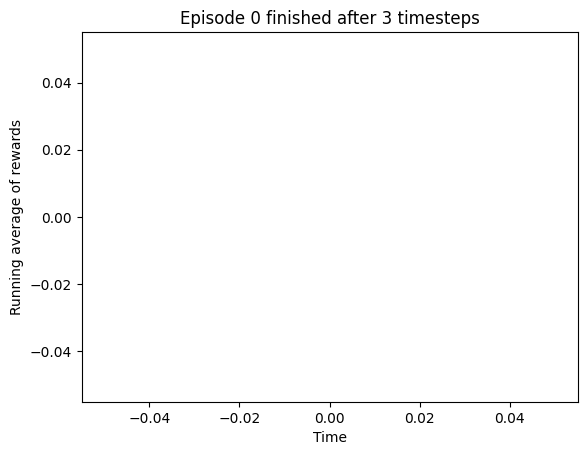

AssertionError: These coordinates already contain a stone.

In [9]:
import sys

env.reset()
q_learner.learn(batch_size=64, num_episodes=sys.maxsize, eps_start=0.1, eps_end=0.1, eps_decay=1, gamma=1,
                target_net_update_rate=0.0005, learning_rate=0.001, print_every=50)

In [ ]:
import os
import torch

# load newest model from models folder
q_learner.load_policy("models/model.pt")


def machine(board, action_set):
    board = convert_board(env.engine, board)
    board = np.array(board)
    board = board.transpose((2, 0, 1))
    board = torch.tensor(board, dtype=torch.float32, device=q_learner.device).unsqueeze(0)
    action_set = [env.engine.coordinate_to_scalar(x) for x in action_set]
    return env.engine.scalar_to_coordinates(q_learner._eps_greedy_action(board, 0, action_set))


env.engine.reset()
env.engine.machine_vs_machine(machine, None)